In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import moabb
moabb.set_log_level('info')

from moabb.datasets import BNCI2014001
dataset = BNCI2014001()
dataset.subject_list = dataset.subject_list[:2]

from moabb.paradigms import MotorImagery

p = MotorImagery(n_classes=4)
timeseries, labels, table = p.get_data(dataset, dataset.subject_list[:2])

2021-02-10 01:38:35 phi root[37526] WARNING Choosing from all possible events


In [2]:
from sklearn.pipeline import make_pipeline

In [3]:
from moabb.pipelines.fbcsp_select import FBCSP_Select
from moabb.pipelines.hilbert import Hilbert
from moabb.pipelines.resample import Resample

In [4]:
p = make_pipeline(
    FBCSP_Select(),
    Hilbert(),
    Resample(),
    'passthrough'
)

In [5]:
r = p.fit_transform(timeseries, labels)

In [6]:
r.shape

(1152, 8, 40)

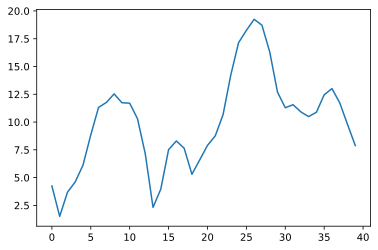

In [7]:
plt.plot(r[0, 0, :])

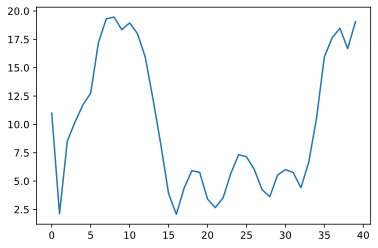

In [8]:
plt.plot(r[4, 0, :])